In [77]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pprint
from sklearn import metrics

In [98]:
results_dir = "/s/red/b/nobackup/data/eggnog_cpm/training_files/common_train/0807180500pm/testing/results/"
# results_dir = "/s/red/b/nobackup/data/eggnog_cpm/training_files/rmpe_test/test_320x240/testing/results/"
npy_file_pck = 'test_pck_ep115_nTest_5000_time080920181137.npy'
npy_file_pckh = 'test_pckh_ep115_nTest_5000_time080920181137.npy'

# pck
pck = np.load(os.path.join(results_dir, npy_file_pck))
print("pck\n")
pprint.pprint(pck)
print(pck.shape)
# pck_at = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
pck_at = [0.0, 0.02, 0.04, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
# pck_at = [0.0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
print("pck_at\n", pck_at)

# pckh
pckh = np.load(os.path.join(results_dir, npy_file_pckh))
print("\npckh\n")
pprint.pprint(pckh)
print(pckh.shape)
pckh_at = [0.0, 0.02, 0.04, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
# pckh_at = [0.0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
print("pckh_at\n", pckh_at)


joints = ['Head', 'Spine_Shoulder (Neck)', 'Left Shoulder', 'Left Elbow', 'Left Wrist', 'Right Shoulder', 'Right Elbow', 'Right Wrist', 'Left Hip', 'Right Hip']
print("\njoints", joints)

pck

array([[0.    , 0.0392, 0.4312, 0.9636, 0.9906, 0.997 , 0.998 , 0.998 ,
        0.9984, 0.9984, 0.9984, 0.9988, 0.9998, 1.    , 1.    , 1.    ],
       [0.    , 0.0314, 0.2574, 0.8036, 0.9314, 0.9758, 0.9894, 0.9938,
        0.9956, 0.9956, 0.9956, 0.9958, 0.9958, 0.9958, 0.9966, 0.9966],
       [0.    , 0.0536, 0.4282, 0.955 , 0.9848, 0.9918, 0.9952, 0.9966,
        0.997 , 0.997 , 0.997 , 0.9972, 0.9972, 0.9976, 0.998 , 0.998 ],
       [0.    , 0.1246, 0.4566, 0.8452, 0.9082, 0.9516, 0.9742, 0.9828,
        0.9864, 0.988 , 0.9912, 0.9924, 0.9938, 0.9956, 0.9956, 0.9958],
       [0.    , 0.079 , 0.272 , 0.5948, 0.7142, 0.7972, 0.8416, 0.8738,
        0.8982, 0.9152, 0.9368, 0.9454, 0.9506, 0.9534, 0.955 , 0.9566],
       [0.    , 0.0788, 0.367 , 0.8946, 0.9576, 0.979 , 0.9856, 0.9878,
        0.9886, 0.9892, 0.9896, 0.9898, 0.9898, 0.9898, 0.9904, 0.9906],
       [0.    , 0.0464, 0.3024, 0.7866, 0.872 , 0.9206, 0.9478, 0.9606,
        0.9712, 0.9738, 0.9804, 0.9818, 0.983 , 0.983

(5, 2)


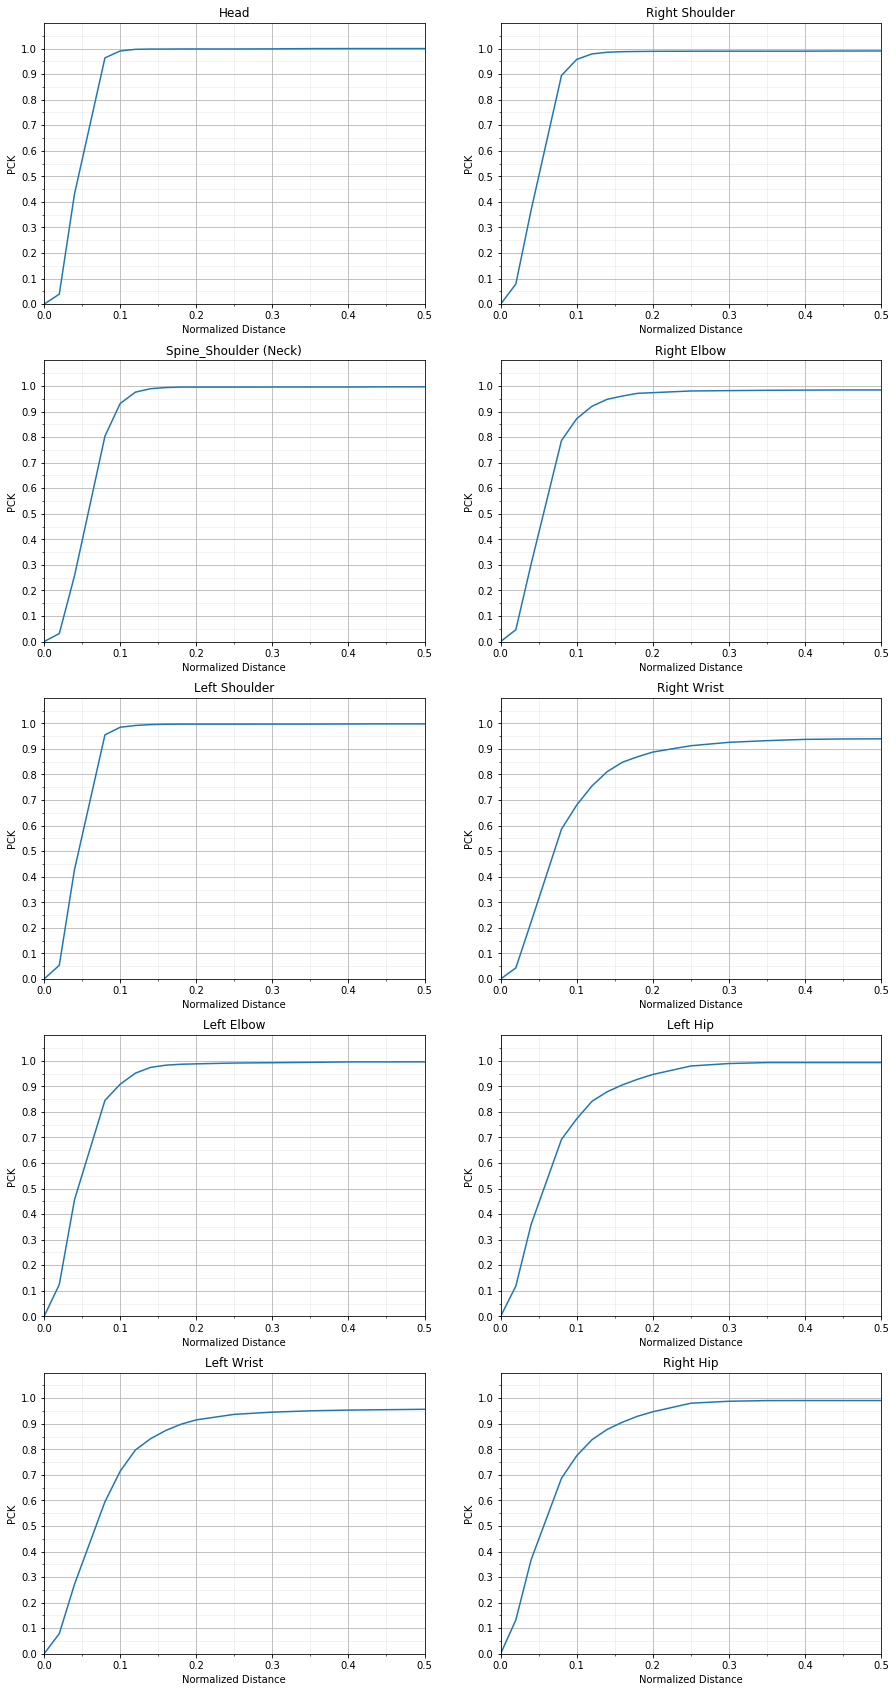

In [99]:
##### pck
fig, ax = plt.subplots(nrows=5, ncols=2)
print(ax.shape)
# ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = ax.flatten()
fig.set_size_inches((15, 30))

x = pck_at
x_label = "Normalized Distance"
y_label = "PCK"

# # 1 head
# y = pck[0]
# ax0.plot(x,y)
# # ax0.legend(prop={'size': 10})
# ax0.set(xlabel=x_label, ylabel=y_label, title='Head')
# ax0.grid()

for p in range(pck.shape[0]):
    i = p%5
    j = 0 if p<5 else 1
    
    y = pck[p]
#     ax[p].imshow(np.zeros((10,10)))
    
    # Major ticks every .1, minor ticks every .05
    major_ticks = np.arange(0, 1.1, .1)
    minor_ticks = np.arange(0, 1.1, .05)

    ax[i][j].set_xticks(major_ticks)
    ax[i][j].set_xticks(minor_ticks, minor=True)
    ax[i][j].set_yticks(major_ticks)
    ax[i][j].set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    # ax[i][j].grid(which='both')

    # Or if you want different settings for the grids:
    ax[i][j].grid(which='minor', alpha=0.2)
    ax[i][j].grid(which='major', alpha=0.9)


    ax[i][j].plot(x, y)
    ax[i][j].set(xlabel=x_label, ylabel=y_label, xlim=[0, 0.5], ylim=[0, 1.1], title=joints[p])
    ax[i][j].grid(linestyle = '-')

    
# fig.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, npy_file_pck.split('.')[0] + "_individual_joints.png"))

mean pck [0.      0.07472 0.34632 0.78088 0.8587  0.90466 0.92994 0.9453  0.95618
 0.96382 0.97616 0.98042 0.9826  0.98372 0.98428 0.98454] (16,)
Area under the curve 0.4309122


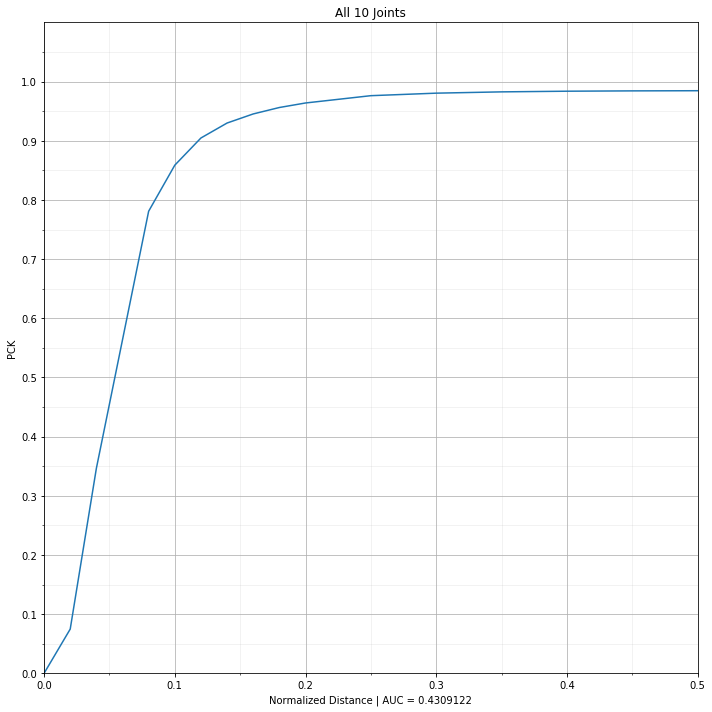

In [100]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((10, 10))

x = pck_at

# Major ticks every .1, minor ticks every .05
major_ticks = np.arange(0, 1.1, .1)
minor_ticks = np.arange(0, 1.1, .05)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
# ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.9)

# 1 all joints
y = np.mean(pck, axis=0)
print("mean pck", y, y.shape)
auc = round(metrics.auc(x, y), 7)
print("Area under the curve", auc)

x_label = "Normalized Distance" + " | AUC = " + str(auc)
y_label = "PCK"

ax.plot(x, y)
ax.set(xlabel=x_label, ylabel=y_label, xlim=[0, 0.5], ylim=[0, 1.1], title='All 10 Joints')
ax.grid(linestyle = '-')

fig.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, npy_file_pck.split('.')[0] + "_all_AUC_" + str(auc) + ".png"))


(5, 2)


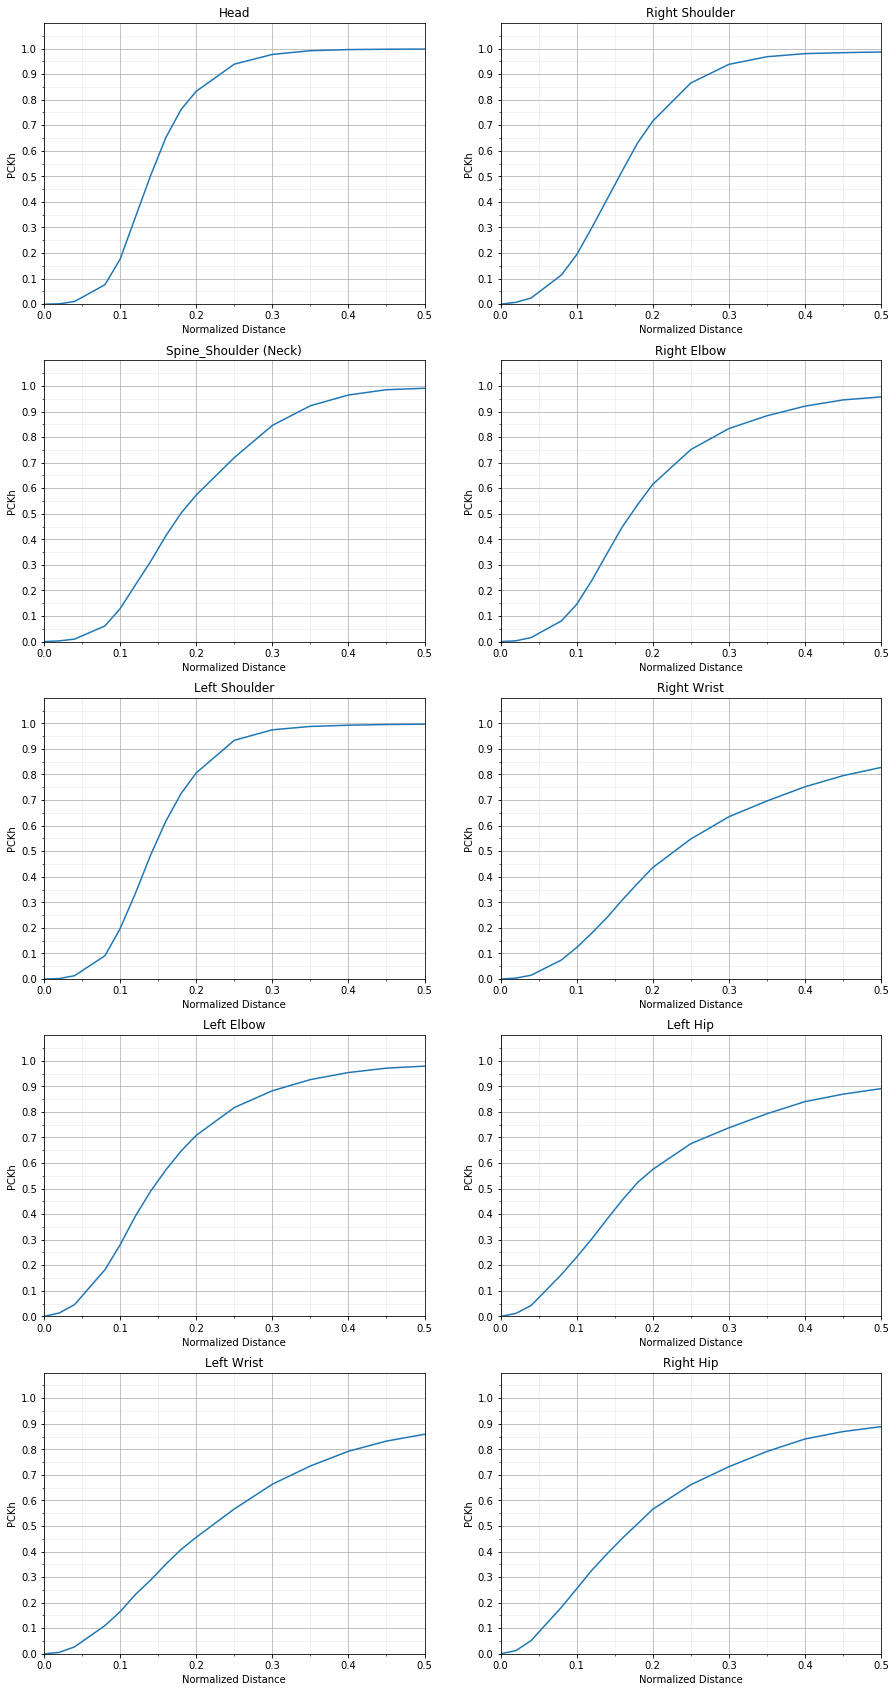

In [101]:
##### pckh
fig, ax = plt.subplots(nrows=5, ncols=2)
print(ax.shape)
fig.set_size_inches((15, 30))

x = pckh_at
x_label = "Normalized Distance"
y_label = "PCKh"
for p in range(pckh.shape[0]):
    i = p%5
    j = 0 if p<5 else 1
    
    y = pckh[p]

    # Major ticks every .1, minor ticks every .05
    major_ticks = np.arange(0, 1.1, .1)
    minor_ticks = np.arange(0, 1.1, .05)

    ax[i][j].set_xticks(major_ticks)
    ax[i][j].set_xticks(minor_ticks, minor=True)
    ax[i][j].set_yticks(major_ticks)
    ax[i][j].set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    # ax[i][j].grid(which='both')

    # Or if you want different settings for the grids:
    ax[i][j].grid(which='minor', alpha=0.2)
    ax[i][j].grid(which='major', alpha=0.9)


    ax[i][j].plot(x, y)
    ax[i][j].set(xlabel=x_label, ylabel=y_label, xlim=[0, 0.5], ylim=[0, 1.1], title=joints[p])
    ax[i][j].grid(linestyle = '-')

# fig.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, npy_file_pckh.split('.')[0] + "_individual_joints.png"))

mean pck [0.      0.00624 0.02536 0.11372 0.18974 0.28718 0.38482 0.47948 0.56158
 0.6286  0.74776 0.822   0.86956 0.90336 0.92454 0.93746] (16,)
Area under the curve 0.3011517


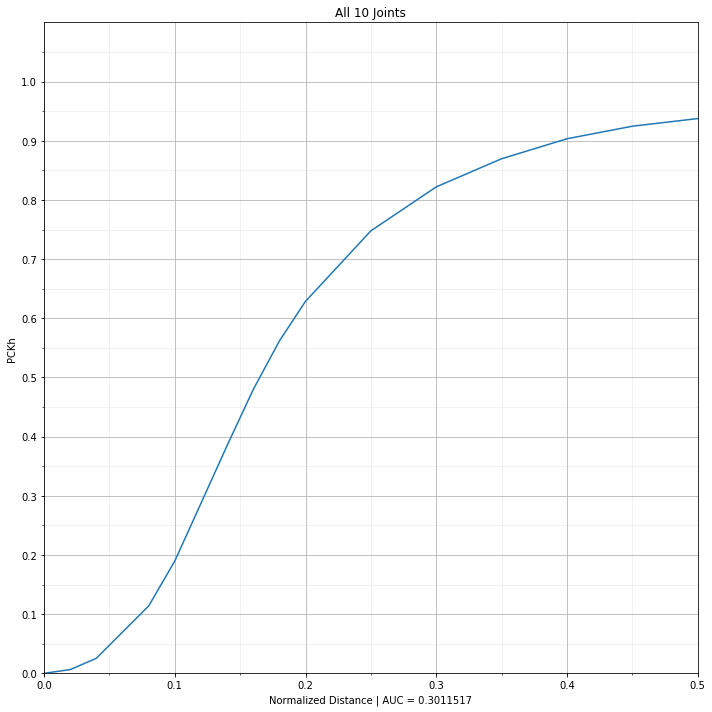

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((10, 10))

x = pckh_at

# Major ticks every .1, minor ticks every .05
major_ticks = np.arange(0, 1.1, .1)
minor_ticks = np.arange(0, 1.1, .05)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
# ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.9)

# 1 all joints
y = np.mean(pckh, axis=0)
print("mean pck", y, y.shape)
auc = round(metrics.auc(x, y), 7)
print("Area under the curve", auc)

x_label = "Normalized Distance" + " | AUC = " + str(auc)
y_label = "PCKh"

ax.plot(x, y)
ax.set(xlabel=x_label, ylabel=y_label, xlim=[0, 0.5], ylim=[0, 1.1], title='All 10 Joints')
ax.grid(linestyle = '-')

fig.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, npy_file_pckh.split('.')[0] + "_all_AUC_" + str(auc) + ".png"))
